In [64]:
import pandas as pd
df=pd.read_csv("/content/crop.csv")
df

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2193,116,38,34,23.292503,50.045570,6.020947,183.468585,jute
2194,97,35,26,24.914610,53.741447,6.334610,166.254931,jute
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,jute
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,jute


In [65]:
df.head

<bound method NDFrame.head of         N   P   K  temperature   humidity        ph    rainfall label
0      90  42  43    20.879744  82.002744  6.502985  202.935536  rice
1      85  58  41    21.770462  80.319644  7.038096  226.655537  rice
2      60  55  44    23.004459  82.320763  7.840207  263.964248  rice
3      74  35  40    26.491096  80.158363  6.980401  242.864034  rice
4      78  42  42    20.130175  81.604873  7.628473  262.717340  rice
...   ...  ..  ..          ...        ...       ...         ...   ...
2193  116  38  34    23.292503  50.045570  6.020947  183.468585  jute
2194   97  35  26    24.914610  53.741447  6.334610  166.254931  jute
2195  107  34  32    26.774637  66.413269  6.780064  177.774507  jute
2196   99  15  27    27.417112  56.636362  6.086922  127.924610  jute
2197  118  33  30    24.131797  67.225123  6.362608  173.322839  jute

[2198 rows x 8 columns]>

In [66]:
df.dtypes

N                int64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
dtype: object

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2198 entries, 0 to 2197
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2198 non-null   int64  
 1   P            2198 non-null   int64  
 2   K            2198 non-null   int64  
 3   temperature  2198 non-null   float64
 4   humidity     2198 non-null   float64
 5   ph           2198 non-null   float64
 6   rainfall     2198 non-null   float64
 7   label        2198 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.5+ KB


In [68]:
df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [69]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2198.000000,2198.000000,2198.000000,2198.000000,2198.000000,2198.000000,2198.000000
mean,50.497270,53.388535,48.163785,25.616861,71.495628,6.469207,103.435819
std,36.889256,32.989110,50.668598,5.065851,22.268855,0.774237,54.975251
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.767412,60.270822,5.971452,64.537413
50%,37.000000,51.000000,32.000000,25.598693,80.483245,6.424285,94.772563
75%,84.000000,68.000000,49.000000,28.561966,89.972292,6.923909,124.075856
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [70]:
df.duplicated().sum()

0

In [71]:
cat_col=['label']
df_dummy=pd.get_dummies(df,columns=cat_col)
df_dummy.head(5)

,N,P,K,temperature,humidity,ph,rainfall,label_cotton,label_jute,label_rice
0,90,42,43,20.879744,82.002744,6.502985,202.935536,0,0,1
1,85,58,41,21.770462,80.319644,7.038096,226.655537,0,0,1
2,60,55,44,23.004459,82.320763,7.840207,263.964248,0,0,1
3,74,35,40,26.491096,80.158363,6.980401,242.864034,0,0,1
4,78,42,42,20.130175,81.604873,7.628473,262.717340,0,0,1


In [72]:
df_dummy.shape

(2198, 10)

In [73]:
df_dummy.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall',
       'label_cotton', 'label_jute', 'label_rice'],
      dtype='object')

In [74]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
df=df.apply(LabelEncoder().fit_transform)

1. STANDARD SCLAER NORMALIZATION

In [75]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
standard = scaler.fit_transform(df)
print(standard)

[[ 1.07383921e+00 -3.28305382e-01  4.07521706e-01 ...  1.77302763e-01
   1.53425991e+00  1.22544166e+00]
 [ 9.38022827e-01  2.42367002e-01  2.96595055e-01 ...  1.02835602e+00
   1.61936523e+00  1.22544166e+00]
 [ 2.58940915e-01  1.35365930e-01  4.62985032e-01 ...  1.60202896e+00
   1.69186236e+00  1.22544166e+00]
 ...
 [ 1.53561491e+00 -6.13641574e-01 -2.02574876e-01 ...  6.65870375e-01
   1.29155212e+00  5.57272242e-04]
 [ 1.31830870e+00 -1.29131503e+00 -4.79891505e-01 ... -6.81630620e-01
   8.92817911e-01  5.57272242e-04]
 [ 1.83441095e+00 -6.49308598e-01 -3.13501528e-01 ... -1.36326124e-01
   1.25215151e+00  5.57272242e-04]]


2. MIN MAX NORMALIZATION

In [119]:
from sklearn import preprocessing
min_max_scaler=preprocessing.MinMaxScaler(feature_range=(10,20))
x_scaled=min_max_scaler.fit_transform(df[['temperature']].values.astype(float))
df['normalizes']=x_scaled
df[['temperature','normalizes']]

,temperature,normalizes
0,361,11.643150
1,437,11.989076
2,583,12.653619
3,1277,15.812472
4,307,11.397360
...,...,...
2193,637,12.899408
2194,946,14.305872
2195,1326,16.035503
2196,1440,16.554392


3. Z-SCORE NORMALIZATION

In [120]:
from scipy import stats
df['zscore']=stats.zscore(df['temperature'])
df.sort_values(by='zscore')
df[['temperature','zscore']]

,temperature,zscore
0,361,-1.162318
1,437,-1.042540
2,583,-0.812441
3,1277,0.281320
4,307,-1.247423
...,...,...
2193,637,-0.727335
2194,946,-0.240344
2195,1326,0.358546
2196,1440,0.538212



COMPARING BOTH MIN MAX AND Z SCORE NORMALIZATION

In [121]:
prd_data=df['temperature']
min_max_s=(prd_data - prd_data.min()) / (prd_data.max() - prd_data.min())
z_score_s=(prd_data - prd_data.mean()) / prd_data.std()
normalizes_data = pd.DataFrame({"Original": prd_data, 'Min-Max Scaled': min_max_s, 'Z-Scored Scaled': z_score_s})
print(normalizes_data)

      Original  Min-Max Scaled  Z-Scored Scaled
0          361        0.164315        -1.162054
1          437        0.198908        -1.042303
2          583        0.265362        -0.812256
3         1277        0.581247         0.281256
4          307        0.139736        -1.247140
...        ...             ...              ...
2193       637        0.289941        -0.727170
2194       946        0.430587        -0.240289
2195      1326        0.603550         0.358464
2196      1440        0.655439         0.538090
2197       788        0.358671        -0.489244

[2198 rows x 3 columns]


In [76]:
#Identifying target variable
Y_1=df_dummy[['label_cotton']]
Y_2=df_dummy[['label_jute']]
Y_3=df_dummy[['label_rice']]
X=df_dummy.drop(columns=['label_cotton','label_jute','label_rice'])

In [77]:
X

,N,P,K,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340
...,...,...,...,...,...,...,...
2193,116,38,34,23.292503,50.045570,6.020947,183.468585
2194,97,35,26,24.914610,53.741447,6.334610,166.254931
2195,107,34,32,26.774637,66.413269,6.780064,177.774507
2196,99,15,27,27.417112,56.636362,6.086922,127.924610


In [78]:
Y_1

,label_cotton
0,0
1,0
2,0
3,0
4,0
...,...
2193,0
2194,0
2195,0
2196,0


In [79]:
Y_2

,label_jute
0,0
1,0
2,0
3,0
4,0
...,...
2193,1
2194,1
2195,1
2196,1


In [80]:
Y_3

,label_rice
0,1
1,1
2,1
3,1
4,1
...,...
2193,0
2194,0
2195,0
2196,0


TRAIN TEST SPLIT

In [81]:
from sklearn.model_selection import train_test_split
x_train,x_test,y1_train,y1_test = train_test_split(X,Y_1,test_size=0.25,random_state=42)
x_train,x_test,y2_train,y2_test = train_test_split(X,Y_2,test_size=0.25,random_state=42)
x_train,x_test,y3_train,y3_test = train_test_split(X,Y_3,test_size=0.25,random_state=42)

NAIVE BAYES : GaussianNB ALGORITHM

In [82]:
from sklearn.naive_bayes import GaussianNB
naive_model= GaussianNB()
naive_model.fit(x_train, y1_train)
naive_model.fit(x_train, y2_train)
naive_model.fit(x_train, y3_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [83]:
y1_test['Predicted']=naive_model.predict(x_test)
y1_test

,label_cotton,Predicted
427,0,1
1128,1,1
367,0,1
1771,0,0
350,0,1
...,...,...
1270,1,0
294,0,1
759,1,1
1965,0,0


In [84]:
y2_test['Predicted']=naive_model.predict(x_test)
y2_test

,label_jute,Predicted
427,0,1
1128,0,1
367,0,1
1771,1,0
350,0,1
...,...,...
1270,0,0
294,0,1
759,0,1
1965,1,0


In [85]:
y3_test['Predicted']=naive_model.predict(x_test)
y3_test

,label_rice,Predicted
427,1,1
1128,0,1
367,1,1
1771,0,0
350,1,1
...,...,...
1270,0,0
294,1,1
759,0,1
1965,0,0


ACCURACY SCORE

In [86]:
import numpy as np
from sklearn.metrics import confusion_matrix,accuracy_score
accuracy=accuracy_score(y1_test['label_cotton'],y1_test['Predicted'])
accuracy=np.round(accuracy,2)
print('Accuracy to harvest cotton is:',accuracy)

Accuracy to harvest cotton is: 0.49


In [87]:
accuracy=accuracy_score(y2_test['label_jute'],y2_test['Predicted'])
accuracy=np.round(accuracy,2)
print('Accuracy to harvest jute is:',accuracy)

Accuracy to harvest jute is: 0.32


In [88]:
accuracy=accuracy_score(y3_test['label_rice'],y3_test['Predicted'])
accuracy=np.round(accuracy,2)
print('Accuracy to harvest rice is:',accuracy)

Accuracy to harvest rice is: 0.8


CONFUSION MATRIX

In [89]:
print(confusion_matrix(y1_test['label_cotton'],y1_test['Predicted']))

[[213 160]
 [121  56]]


In [90]:
print(confusion_matrix(y2_test['label_jute'],y2_test['Predicted']))

[[165 206]
 [169  10]]


In [91]:
print(confusion_matrix(y3_test['label_rice'],y3_test['Predicted']))

[[290  66]
 [ 44 150]]


DECISION TREE CLASSIFICATION MODEL

In [92]:
from sklearn.preprocessing import LabelEncoder

# Encode the target variable using label encoder
labelencoder_X=LabelEncoder()
X=X.apply(LabelEncoder().fit_transform)

In [122]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# Split the data into training and test sets for the first set of features and labels
X_train, X_test, y1_train, y1_test = train_test_split(X, Y_1, test_size=0.25, random_state=42)

# Initialize a decision tree classifier for the first set of features and labels
clf = DecisionTreeClassifier(random_state=42)

# Train the classifier on the training set for the first set of features and labels
clf.fit(X_train, y1_train)

# Split the data into training and test sets for the second set of features and labels
X_train, X_test, y2_train, y2_test = train_test_split(X, Y_2, test_size=0.25, random_state=42)

# Initialize a decision tree classifier for the second set of features and labels
clf1 = DecisionTreeClassifier(random_state=42)

# Train the classifier on the training set for the second set of features and labels
clf1.fit(X_train, y2_train)

# Split the data into training and test sets for the third set of features and labels
X_train, X_test, y3_train, y3_test = train_test_split(X, Y_3, test_size=0.25, random_state=42)

# Initialize a decision tree classifier for the third set of features and labels
clf2 = DecisionTreeClassifier(random_state=42)

# Train the classifier on the training set for the third set of features and labels
clf2.fit(X_train, y3_train)

print("Successfully ran")

Successfully ran


In [123]:
regressor = DecisionTreeClassifier(criterion='gini',max_depth=4,splitter='best')
X
regressor.fit(X,Y_2)
X_in=np.array([2,0,3,2,1,2,2])
y_pred=regressor.predict([X_in])
print("Prediction: ",y_pred)

Prediction:  [0]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


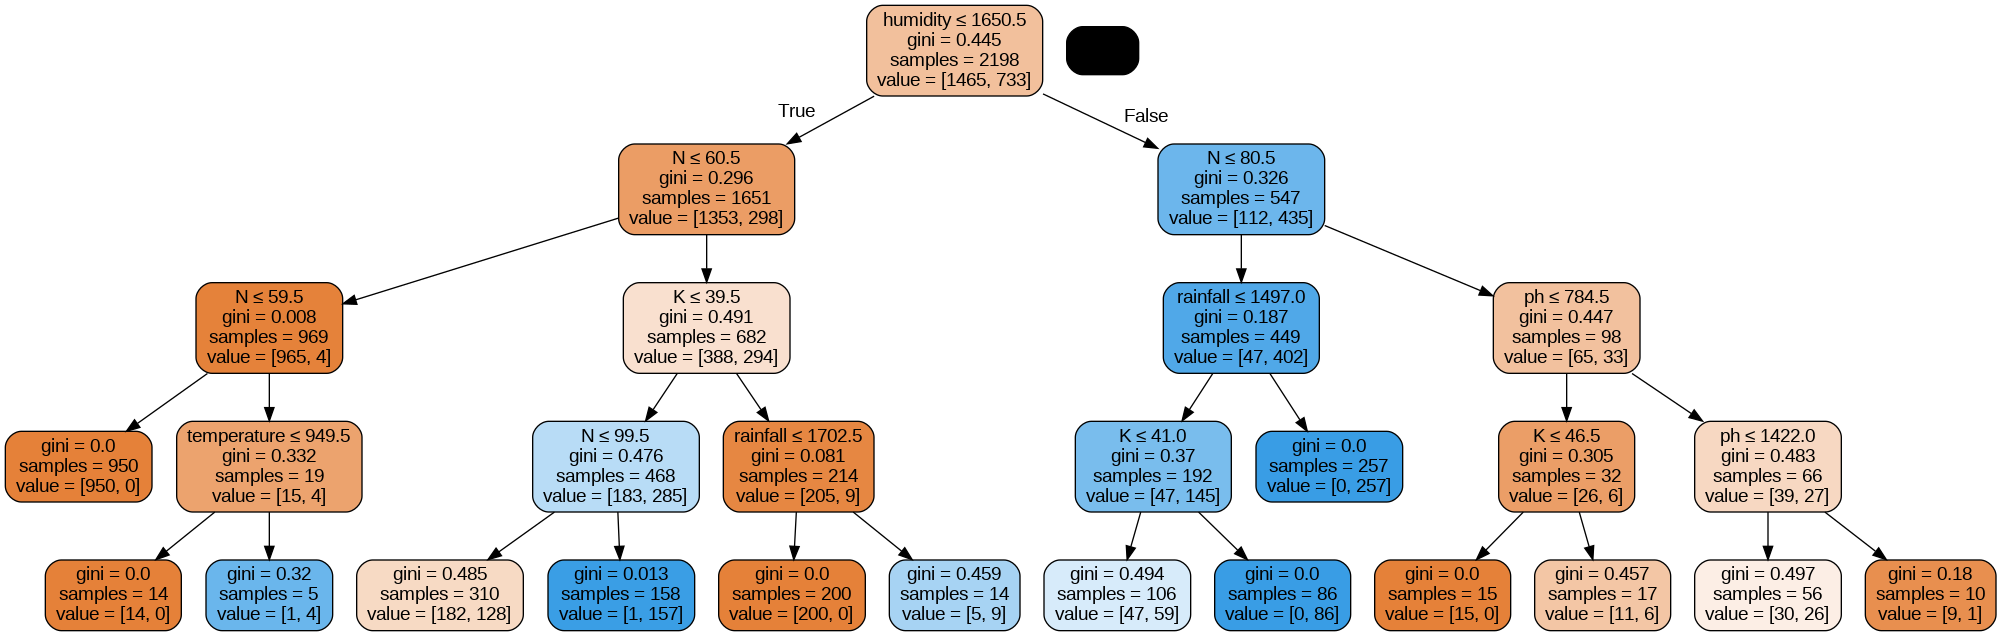

In [124]:
from six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

dot_data=StringIO()
feature_cols=['N','P','K','temperature','humidity','ph','rainfall']
export_graphviz(regressor,out_file=dot_data, filled=True,rounded=True,special_characters=True, feature_names = feature_cols)
graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png("Decisiontree.png")
Image(graph.create_png())

MAKE PREDICTIONS ON THE TEST SET

In [125]:
y1_pred = clf.predict(X_test)
y2_pred = clf1.predict(X_test)
y3_pred = clf2.predict(X_test)

In [126]:
y1_pred

array([0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,

In [127]:
y2_pred

array([0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1,

In [128]:
y3_pred

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,

In [136]:
accuracy = accuracy_score(y1_test, y1_pred)
print("Accuracy score for the first classifier(cotton):", accuracy)

Accuracy score for the first classifier(cotton): 0.9654545454545455


In [137]:
accuracy = accuracy_score(y2_test, y2_pred)
print("Accuracy score for the second classifier(jute):", accuracy)

Accuracy score for the second classifier(jute): 0.9690909090909091


In [138]:
accuracy = accuracy_score(y3_test, y3_pred)
print("Accuracy score for the third classifier(rice):", accuracy)

Accuracy score for the third classifier(rice): 0.9709090909090909


RANDOM FOREST MODEL

In [130]:
#CHECKING FOR COTTON PRODUCTION

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y1_train)
y1_pred = rf.predict(X_test)

<ipython-input-130-325a51b36a79>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y1_train)


In [135]:
rf_acc=accuracy_score(y1_test,y1_pred) #compares the original y_test to the y pred value
print("Accuracy for Random Forest for cotton: ",rf_acc)

Accuracy for Random Forest for cotton:  0.9654545454545455


In [104]:
#CHECKING FOR JUTE PRODUCTION

rf = RandomForestClassifier()
rf.fit(X_train, y2_train)
y2_pred = rf.predict(X_test)

<ipython-input-104-1c6e45064812>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y2_train)


In [105]:
rf_acc=accuracy_score(y2_test,y2_pred) #compares the original y_test to the y pred value
print("Accuracy for Random Forest for jute: ",rf_acc)

Accuracy for Random Forest for jute:  0.9727272727272728


In [106]:
#CHECKING FOR RICE PRODUCTION

rf = RandomForestClassifier()
rf.fit(X_train, y3_train)
y3_pred = rf.predict(X_test)

<ipython-input-106-d966d1d38b3e>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y3_train)


In [134]:
rf_acc=accuracy_score(y3_test,y3_pred) #compares the original y_test to the y pred value
print("Accuracy for Random Forest for rice: ",rf_acc)

Accuracy for Random Forest for rice:  0.9709090909090909


In [108]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y2_test,y2_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.9653284946317516

<ipython-input-139-4beb950019be>:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train,y1_train)
<ipython-input-139-4beb950019be>:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train,y1_train)
<ipython-input-139-4beb950019be>:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train,y1_train)
<ipython-input-139-4beb950019be>:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train,y1_train)
<ipython-input-139-4beb950019be>:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please cha

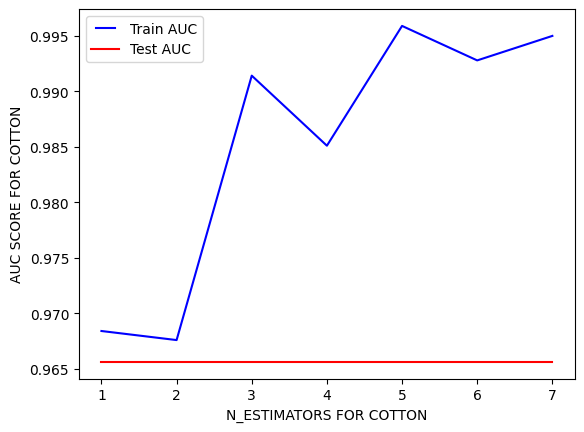

In [139]:
import matplotlib.pyplot as plt
n_estimators=[1,2,3,4,5,6,7]
train_results=[]
test_result=[]

for estimator in n_estimators:
  rf=RandomForestClassifier(n_estimators=estimator, n_jobs=-1)
  rf.fit(x_train,y1_train)
  train_pred=rf.predict(x_train)
  false_positive_rate, true_positive_rate, thresholds = roc_curve(y1_train,train_pred)
  roc_auc=auc(false_positive_rate, true_positive_rate)
  train_results.append(roc_auc)
  y_pred=rf.predict(x_test)
  false_positive_rate,true_positive_rate, thresholds = roc_curve(y1_test,y1_pred)
  roc_auc=auc(false_positive_rate, true_positive_rate)
  test_result.append(roc_auc)

from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(n_estimators, train_results, "b", label='Train AUC')
line2, = plt.plot(n_estimators,test_result,'r',label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC SCORE FOR COTTON')
plt.xlabel('N_ESTIMATORS FOR COTTON')
plt.show()

<ipython-input-109-faf0b1aea9f0>:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train,y2_train)
<ipython-input-109-faf0b1aea9f0>:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train,y2_train)
<ipython-input-109-faf0b1aea9f0>:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train,y2_train)
<ipython-input-109-faf0b1aea9f0>:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train,y2_train)
<ipython-input-109-faf0b1aea9f0>:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please cha

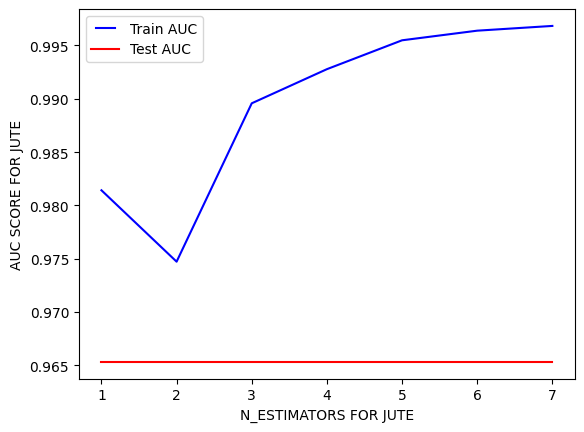

In [109]:
import matplotlib.pyplot as plt
n_estimators=[1,2,3,4,5,6,7]
train_results=[]
test_result=[]

for estimator in n_estimators:
  rf=RandomForestClassifier(n_estimators=estimator, n_jobs=-1)
  rf.fit(x_train,y2_train)
  train_pred=rf.predict(x_train)
  false_positive_rate, true_positive_rate, thresholds = roc_curve(y2_train,train_pred)
  roc_auc=auc(false_positive_rate, true_positive_rate)
  train_results.append(roc_auc)
  y_pred=rf.predict(x_test)
  false_positive_rate,true_positive_rate, thresholds = roc_curve(y2_test,y2_pred)
  roc_auc=auc(false_positive_rate, true_positive_rate)
  test_result.append(roc_auc)

from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(n_estimators, train_results, "b", label='Train AUC')
line2, = plt.plot(n_estimators,test_result,'r',label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC SCORE FOR JUTE')
plt.xlabel('N_ESTIMATORS FOR JUTE')
plt.show()

<ipython-input-110-7208cf9b86b3>:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train,y3_train)
<ipython-input-110-7208cf9b86b3>:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train,y3_train)
<ipython-input-110-7208cf9b86b3>:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train,y3_train)
<ipython-input-110-7208cf9b86b3>:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train,y3_train)
<ipython-input-110-7208cf9b86b3>:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please cha

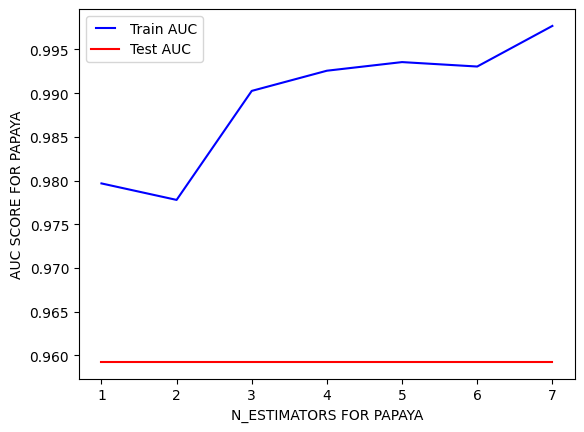

In [110]:
n_estimators=[1,2,3,4,5,6,7]
train_results=[]
test_result=[]

for estimator in n_estimators:
  rf=RandomForestClassifier(n_estimators=estimator, n_jobs=-1)
  rf.fit(x_train,y3_train)
  train_pred=rf.predict(x_train)
  false_positive_rate, true_positive_rate, thresholds = roc_curve(y3_train,train_pred)
  roc_auc=auc(false_positive_rate, true_positive_rate)
  train_results.append(roc_auc)
  y_pred=rf.predict(x_test)
  false_positive_rate,true_positive_rate, thresholds = roc_curve(y3_test,y3_pred)
  roc_auc=auc(false_positive_rate, true_positive_rate)
  test_result.append(roc_auc)

from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(n_estimators, train_results, "b", label='Train AUC')
line2, = plt.plot(n_estimators,test_result,'r',label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC SCORE FOR PAPAYA')
plt.xlabel('N_ESTIMATORS FOR PAPAYA')
plt.show()

STATISTICAL METHODS:

1. MEAN CALCULATION

In [111]:
mean_cal=df.groupby('label')['N','P','K','temperature','humidity','ph','rainfall'].mean()
print(mean_cal)


               N          P          K  temperature     humidity           ph  \
label                                                                           
0      50.930423  46.854025  36.900409  1239.506139  1131.698499  1012.230559   
1      60.221010  40.042292  31.712142  1099.185539  1530.302865  1207.572988   
2      40.236339  51.725410  23.334699   956.614754   632.863388  1075.665301   

          rainfall  
label               
0       752.122783  
1      1479.869031  
2      1063.460383  


<ipython-input-111-50c4cccb169a>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  mean_cal=df.groupby('label')['N','P','K','temperature','humidity','ph','rainfall'].mean()


2. MEDIAN CALCULATION

In [112]:
median_cal=df.groupby('label')['N','P','K','temperature','humidity','ph','rainfall'].median()
print(median_cal)

          N     P     K  temperature  humidity      ph  rainfall
label                                                           
0      36.0  50.0  40.0       1318.0    1149.0   959.0     698.0
1      57.0  35.0  29.0       1034.0    1740.0  1253.0    1619.0
2      33.0  52.0  17.0        876.5     520.5  1090.0     913.5


<ipython-input-112-4e125aec0191>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  median_cal=df.groupby('label')['N','P','K','temperature','humidity','ph','rainfall'].median()


3. MODE CALCULATION

In [113]:
mode_cal=df.groupby('label')['N','P','K','temperature','humidity','ph','rainfall'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else None)
print(mode_cal)

        N   P   K  temperature  humidity   ph  rainfall
label                                                  
0      39  20  40            0       259   13         0
1      31  35  30            6       344  117         7
2      27  55  17           43         0    0       100


<ipython-input-113-bb0340792b67>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  mode_cal=df.groupby('label')['N','P','K','temperature','humidity','ph','rainfall'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else None)


4. STANDARD DEVIATION CALCULATION

In [114]:
std_cal=df.groupby('label')['N','P','K','temperature','humidity','ph','rainfall'].std()
print(std_cal)

               N          P          K  temperature    humidity          ph  \
label                                                                         
0      39.399479  34.396899  17.232250   625.018722  505.531018  576.841459   
1      39.643290  30.907841  19.051421   568.460421  543.716367  567.968118   
2      27.323319  12.378427  14.925029   675.045059  503.416661  731.033372   

         rainfall  
label              
0      472.173892  
1      536.523928  
2      657.019388  


<ipython-input-114-1c8516310fcf>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  std_cal=df.groupby('label')['N','P','K','temperature','humidity','ph','rainfall'].std()
